<a href="https://colab.research.google.com/github/Arjun-P-Dinesh/2348506_Lab6/blob/main/2348506_Lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score

In [4]:
df  = pd.read_csv("insurance.csv")

In [5]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [6]:
df.shape

(1338, 7)

In [8]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [16]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [14]:
df['sex']=le.fit_transform(df['sex'])

In [12]:
df['smoker']=le.fit_transform(df['smoker'])

In [15]:
df = pd.get_dummies(df, columns=['region'], drop_first=True)

In [17]:
df

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,1,0,0
1334,18,0,31.920,0,0,2205.98080,0,0,0
1335,18,0,36.850,0,0,1629.83350,0,1,0
1336,21,0,25.800,0,0,2007.94500,0,0,1


In [18]:
X = df.drop(columns=['charges'])
y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [20]:
y_pred=model.predict(X_test)

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
mae = mean_absolute_error(y_test, y_pred)# Calculate Mean Absolute Error (MAE)
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 4181.1944737536505


In [29]:
mse = mean_squared_error(y_test, y_pred)# Calculate Mean Squared Error (MSE)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 33596915.85136146


In [30]:
rmse = np.sqrt(mse)# Calculate Root Mean Squared Error (RMSE)
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 5796.2846592762735


In [31]:
r2 = r2_score(y_test, y_pred)# Calculate R-squared (R2) score
print("R-squared (R2) score:", r2)

R-squared (R2) score: 0.7835929767120723


In [32]:
rss = np.sum((y_pred - y_test) ** 2)# Calculate Residual Sum of Squares (RSS)
print("Residual Sum of Squares (RSS):", rss)

Residual Sum of Squares (RSS): 9003973448.164871


In [33]:
explained_var = explained_variance_score(y_test, y_pred)# Calculate Explained Variance Score
print("Explained Variance Score:", explained_var)

Explained Variance Score: 0.7839025861417648


In [34]:
# Calculate Adjusted R-squared
n = len(X_test)  # Number of samples
p = X_test.shape[1]  # Number of features
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
print("Adjusted R-squared:", adjusted_r2)

Adjusted R-squared: 0.776908589892368


In [36]:
feature_imp=model.coef_
feature_imp

array([ 2.56975706e+02, -1.85916916e+01,  3.37092552e+02,  4.25278784e+02,
        2.36511289e+04, -3.70677326e+02, -6.57864297e+02, -8.09799354e+02])

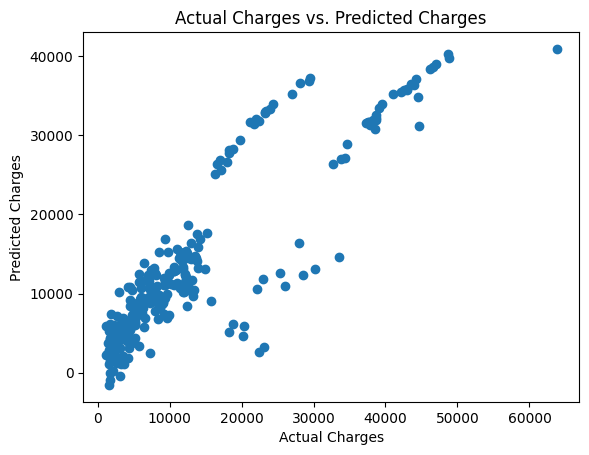

In [37]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual Charges vs. Predicted Charges")
plt.show()